<a href="https://colab.research.google.com/github/Jyotishmoy12/MachineLearning/blob/main/carweightandmpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




### Overview of Linear Regression

**Linear Regression** is a statistical method for modeling the relationship between a dependent variable \(y\) and one or more independent variables \(X\). The simplest form is simple linear regression, which involves one independent variable.

The general form of the linear regression equation is:

\[
y = w \cdot X + b
\]

Where:
- \(y\) = predicted value (dependent variable, e.g., MPG)
- \(X\) = feature (independent variable, e.g., car weight)
- \(w\) = weight (slope of the line)
- \(b\) = bias (y-intercept)

### Step-by-Step Explanation

#### 1. **Cost Function**

The cost function measures how well the linear regression model fits the data. The most commonly used cost function is the **Mean Squared Error (MSE)**, which is defined as:

\[
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_{\text{pred}}^i - y^i)^2
\]

Where:
- \(m\) = number of data points
- \(y_{\text{pred}}^i\) = predicted value for the \(i\)-th data point
- \(y^i\) = actual value for the \(i\)-th data point

The factor of \(\frac{1}{2}\) is used for convenience during differentiation.

#### 2. **Gradient Descent**

**Gradient Descent** is an optimization algorithm used to minimize the cost function by iteratively updating the parameters \(w\) and \(b\). The updates are made in the direction of the negative gradient of the cost function.

**Gradients** for \(w\) and \(b\) are computed as follows:

\[
dw = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{pred}}^i - y^i) \cdot X^i
\]

\[
db = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{pred}}^i - y^i)
\]

Where:
- \(dw\) = gradient of the cost function with respect to weight \(w\)
- \(db\) = gradient of the cost function with respect to bias \(b\)

#### 3. **Updating Parameters**

The parameters \(w\) and \(b\) are updated using the gradients calculated above and a learning rate \(\alpha\):

\[
w = w - \alpha \cdot dw
\]

\[
b = b - \alpha \cdot db
\]

Where:
- \(\alpha\) = learning rate (a small positive number determining the step size for each iteration)

#### 4. **Normalization**

Normalization is a preprocessing step to rescale the input feature \(X\) to a standard range, usually \([0, 1]\) or \([-1, 1]\). This helps in stabilizing the training process and improving convergence speed.

Normalization can be done using:

\[
X_{\text{norm}} = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)}
\]

#### 5. **Prediction**

Once the model is trained, predictions can be made using the learned parameters:

\[
y_{\text{pred}} = w \cdot X_{\text{norm}} + b
\]

For making predictions, ensure that the input feature is normalized in the same way as during training.

### Example Walkthrough

1. **Dataset Creation**: Imagine we create a dataset of car weights and their respective miles per gallon (MPG) values. The relationship is often inverse; heavier cars generally consume more fuel.

2. **Normalization**: We normalize the car weights to bring them between 0 and 1, ensuring the algorithm trains efficiently.

3. **Training the Model**:
   - Initialize \(w\) and \(b\) (usually to zero).
   - For a set number of iterations:
     - Compute the predictions using the current \(w\) and \(b\).
     - Calculate the cost using the MSE formula.
     - Compute the gradients \(dw\) and \(db\).
     - Update \(w\) and \(b\) using the learning rate.

4. **Final Values**: After the training, the final values of \(w\) and \(b\) represent the slope and intercept of the best-fit line through the data.

5. **Prediction**: To predict the MPG of a new car weight, normalize the weight and apply the learned parameters to calculate the predicted MPG.

6. **Visualization**: Visualizing the data points along with the fitted regression line provides insight into the model's performance and how well it fits the data.

### Summary

- **Linear Regression** uses a linear equation to model the relationship between variables.
- The **Cost Function** quantifies the error in predictions.
- **Gradient Descent** is the method for minimizing the cost function and learning optimal parameters.
- **Normalization** is important for effective training.
- The final model can predict outcomes for new data based on the learned parameters.



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a simple synthetic dataset
np.random.seed(42)  # For reproducibility
car_weight = np.random.normal(3000, 500, 100)  # Car weights centered around 3000 lbs
mpg = 40 - (car_weight - 3000) * 0.01 + np.random.normal(0, 2, 100)  # MPG with some noise

data = pd.DataFrame({'Car Weight': car_weight, 'MPG': mpg})

# Show the first few rows of the dataset
print(data.head())


    Car Weight        MPG
0  3248.357077  34.685688
1  2930.867849  39.850031
2  3323.844269  36.076128
3  3761.514928  30.780296
4  2882.923313  40.848195


In [25]:
# Normalize the car weight
car_weight_min = data['Car Weight'].min()
car_weight_max = data['Car Weight'].max()
data['Normalized Car Weight'] = (data['Car Weight'] - car_weight_min) / (car_weight_max - car_weight_min)

# Gradient Descent Function
def gradient_descent(X, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Calculate predictions
        y_pred = w * X + b

        # Calculate the cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)

        # Calculate gradients
        dw = (1 / m) * np.dot(X, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Clip gradients if too large (Gradient Clipping)
        dw = np.clip(dw, -1, 1)
        db = np.clip(db, -1, 1)

        # Update weights
        w -= alpha * dw
        b -= alpha * db

        # Print cost every 100 iterations for debugging
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history


In [26]:
# Parameters
alpha = 0.0001  # Reduced learning rate
iterations = 1000  # Number of iterations
w_initial = 0  # Initial weight
b_initial = 0  # Initial bias

# Train the model
final_w, final_b, cost_history = gradient_descent(
    data['Normalized Car Weight'],
    data['MPG'],
    w=w_initial,
    b=b_initial,
    alpha=alpha,
    iterations=iterations
)

# Print final parameters
print(f"Final values of the model:")
print(f"w (Weight): {final_w}")
print(f"b (Bias): {final_b}")


Iteration 0: Cost = 835.8896624555343
Iteration 100: Cost = 835.2655939437482
Iteration 200: Cost = 834.6417736823416
Iteration 300: Cost = 834.0182016713152
Iteration 400: Cost = 833.3948779106685
Iteration 500: Cost = 832.7718024004016
Iteration 600: Cost = 832.1489751405147
Iteration 700: Cost = 831.5263961310073
Iteration 800: Cost = 830.90406537188
Iteration 900: Cost = 830.2819828631325
Final values of the model:
w (Weight): 0.10000000000000184
b (Bias): 0.10000000000000184


Predicted MPG for a car weighing 3000 lbs: 0.15858075718811332


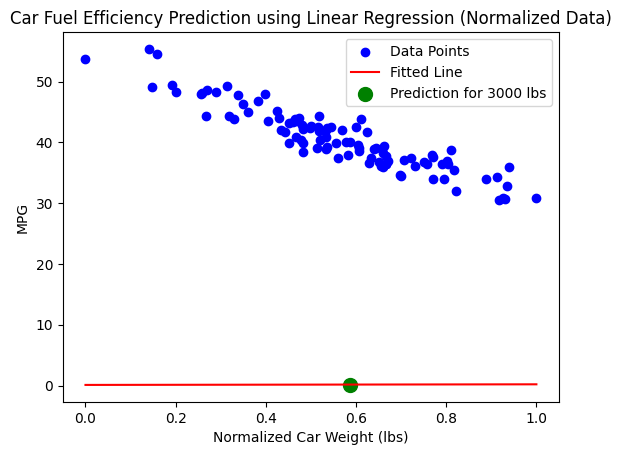

In [27]:
# Make a prediction for a car weight of 3000 lbs
car_weight_to_predict = 3000
normalized_weight_to_predict = (car_weight_to_predict - car_weight_min) / (car_weight_max - car_weight_min)
predicted_mpg = final_w * normalized_weight_to_predict + final_b

print(f"Predicted MPG for a car weighing {car_weight_to_predict} lbs: {predicted_mpg}")

# Plot the data points
plt.scatter(data['Normalized Car Weight'], data['MPG'], color='blue', label='Data Points')

# Plot the fitted line
car_weight_range = np.linspace(0, 1, 100)  # Range of normalized weights
predicted_mpg_range = final_w * car_weight_range + final_b
plt.plot(car_weight_range, predicted_mpg_range, color='red', label='Fitted Line')

# Highlight the predicted MPG
plt.scatter(normalized_weight_to_predict, predicted_mpg, color='green', marker='o', s=100, label=f'Prediction for {car_weight_to_predict} lbs')

# Add labels and title
plt.xlabel('Normalized Car Weight (lbs)')
plt.ylabel('MPG')
plt.title('Car Fuel Efficiency Prediction using Linear Regression (Normalized Data)')
plt.legend()
plt.show()
